# Model Validation

This notebook performs selective validation checks mentioned in the [Agent-based modelling of sociotechnical systems](https://books.google.nl/books?hl=en&lr=&id=rpLBkl-1_7QC&oi=fnd&pg=PR3&dq=agent+based+modelling+of+socio+technical+systems&ots=mSs1UCSXhV&sig=WddXV7v5whTuLU27FUYvuEdxGMM) and reports the results.
These model tests are performed on the calibrated model.

In [3]:
from evidence_files.methods import *
from model.cepai_model import *

## 1. Micro validation

Micro validation is performed by checking agent behaviours and mechanisms matches real world behaviour.
Micro validation is done in two steps by performing two extreme value tests and checking the agent behaviour.


### 1.1 Agents behaviour under extreme policy levers

This is done by setting extreme values for the policy levers and observing agent behaviour through change in the model outputs.
For this validation test, L1 minimum requirement for reused parts is increased to 0.5 and L3 use of better solvable cohesives is increased to 0.8. In addition to this, 1.5 externality is added for the virgin plastic (L4).

In [6]:
levers = {
    "L1": 0.5,  # Minimal requirement for reused parts
    "L2": 0.0,  # Minimal requirement for high-quality plastic
    "L3": 0.8,  # Use better solvable cohesives
    "L4": 1.5,  # Include externality for virgin plastic
    "L5": 0.05  # Minimal requirement for recyclate
}

uncertainties = {
    "X1": 0.0,  # Annual increase factor of oil price
    "X2": 0.0,  # Annual probability for global oil shock
    "X3": 0.0  # Annual increase of recycling efficiency
}

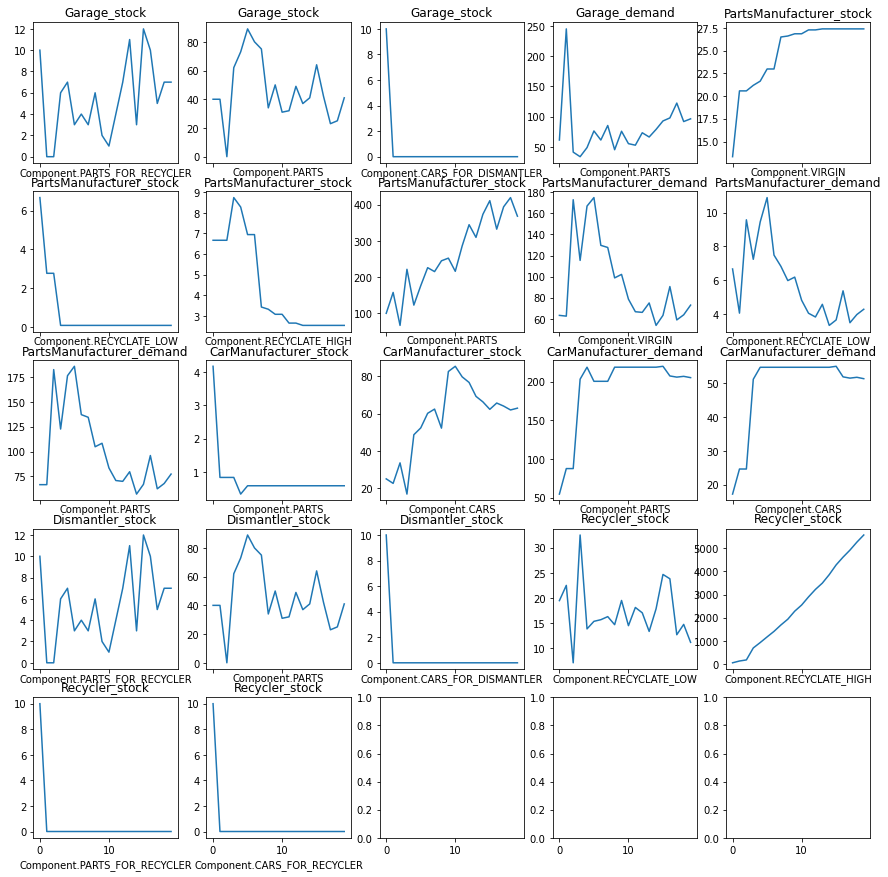

In [8]:
micro_validation(levers=levers, uncertainities=uncertainties, steps=20)

With extreme value of Levers, the parts manufacturers' demand has dropped in most cases after first 10 cycles while demand for automotive parts by car manufacturers is constant. This indicates that once the model has enough reusable parts, demand of standard parts is dropped and parts are reused. Thus, the model behaviour regarding parts reuse is validated.

### 1.2 Agents behaviour under extreme uncertainty values

This is done by setting extreme values for the model uncertainties and observing agent behaviour through change in the model outputs.
For performing this test, the annual increase factor of oil price (X1) is increased to 0.5, while Annual probability for global oil shock (X2) and Annual increase of recycling efficiency (X3) is set to 0.2.

In [89]:
levers = {
    "L1": 0.0,  # Minimal requirement for reused parts
    "L2": 0.0,  # Minimal requirement for high-quality plastic
    "L3": 0.0,  # Use better solvable cohesives
    "L4": 1.0,  # Include externality for virgin plastic
    "L5": 0.05  # Minimal requirement for recyclate, set to 5% as per model calibration.
}

uncertainties = {
    "X1": 0.5,  # Annual increase factor of oil price
    "X2": 0.2,  # Annual probability for global oil shock
    "X3": 0.2  # Annual increase of recycling efficiency
}

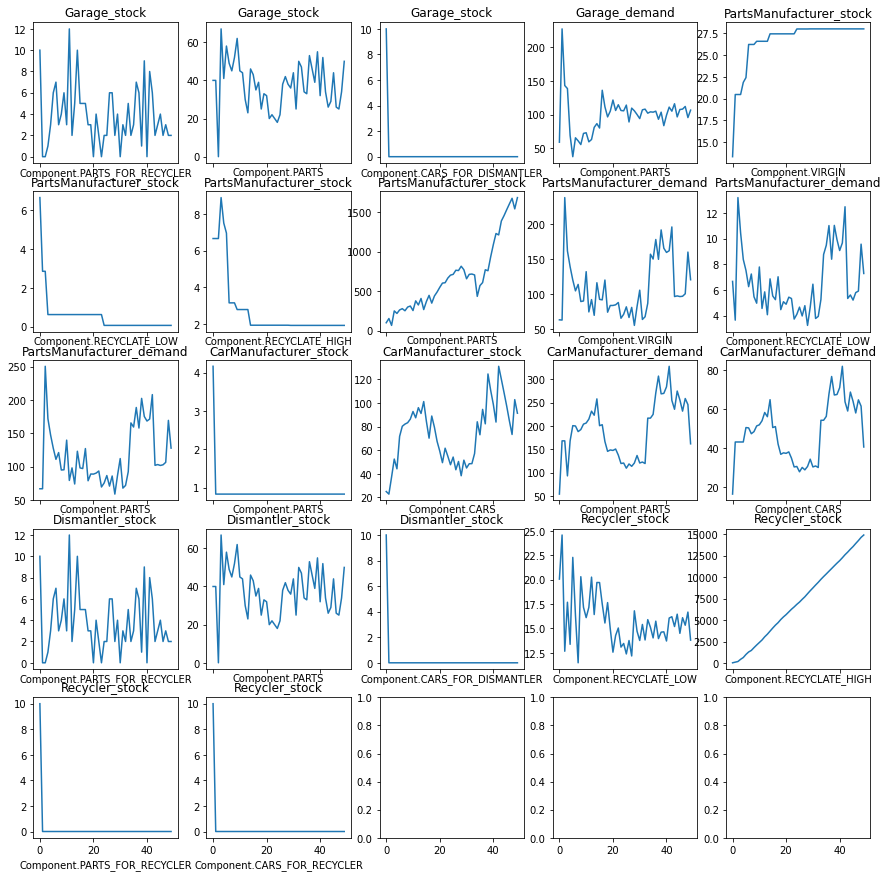

In [95]:
micro_validation(levers=levers, uncertainities=uncertainties, steps=50)

Annual increase of oil stock will result in a price rise for virgin plastic. It can be seen in the demand of virgin and recyclate plastic is dropped initially due to overall price rise. However, aforementioned demand is increased after first 20 cycles because of parts required by the garages to repair the cars.
Thus, it can be concluded that the model exhibit expected theoretical behaviour and effect of oil pricing is successfully validated.

## 2. Macro validation

In macro validation, overall behavior of the model is validated.

## 2.1 Model behaviour under extreme policy levers
For this validation test, model behaviour is evaluated under following conditions.
L1 minimum requirement for reused parts is increased to 0.5 and L3 use of better solvable cohesives is increased to 0.8. In addition to this, 1.5 externality is added for the virgin plastic (L4).

In [133]:
levers = {
    "L1": 0.5,  # Minimal requirement for reused parts
    "L2": 0.0,  # Minimal requirement for high-quality plastic
    "L3": 0.8,  # Use better solvable cohesives
    "L4": 1.5,  # Include externality for virgin plastic
    "L5": 0.05  # Minimal requirement for recyclate
}

uncertainties = {
    "X1": 0.0,  # Annual increase factor of oil price
    "X2": 0.0,  # Annual probability for global oil shock
    "X3": 0.0  # Annual increase of recycling efficiency
}

In [134]:
model = CEPAIModel(levers=levers, uncertainties=uncertainties)

In [137]:
results = model.run(steps=50, time_tracking=True)

Run time: 52.07 seconds
Simulation completed!


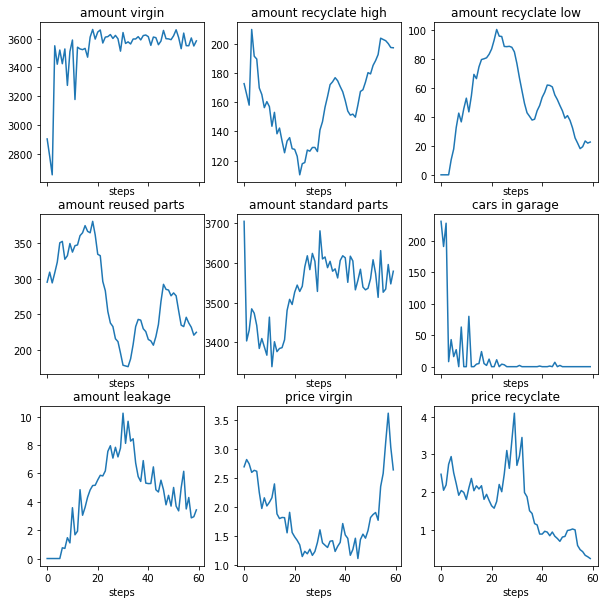

In [138]:
plot_results(results=results)

As shown in the figures above, with extreme policy levers supporting parts reuse, standard parts are used for the car manufacturing in the beginning of the simulation run. As the car starts breaking down around step 10 more reused parts are used. Lastly as the vehicles start reaching their maximum lifetime, standard parts are manufactured to meet the demand for manufacturing new cars.
Thus, the overall model behaviour and agent interaction holds true under the extreme lever values.

## 2.2 Model behaviour under extreme uncertainty values
For this validation test, model behaviour is evaluated under following conditions.
The annual increase factor of oil price (X1) is increased to 0.5, while Annual probability for global oil shock (X2) and Annual increase of recycling efficiency (X3) is set to 0.2.

In [139]:
levers = {
    "L1": 0.0,  # Minimal requirement for reused parts
    "L2": 0.0,  # Minimal requirement for high-quality plastic
    "L3": 0.0,  # Use better solvable cohesives
    "L4": 1.0,  # Include externality for virgin plastic
    "L5": 0.05  # Minimal requirement for recyclate, set to 5% as per model calibration.
}

uncertainties = {
    "X1": 0.5,  # Annual increase factor of oil price
    "X2": 0.2,  # Annual probability for global oil shock
    "X3": 0.2  # Annual increase of recycling efficiency
}

In [140]:
model = CEPAIModel(levers=levers, uncertainties=uncertainties)

In [141]:
results = model.run(steps=50, time_tracking=True)

Run time: 54.21 seconds
Simulation completed!


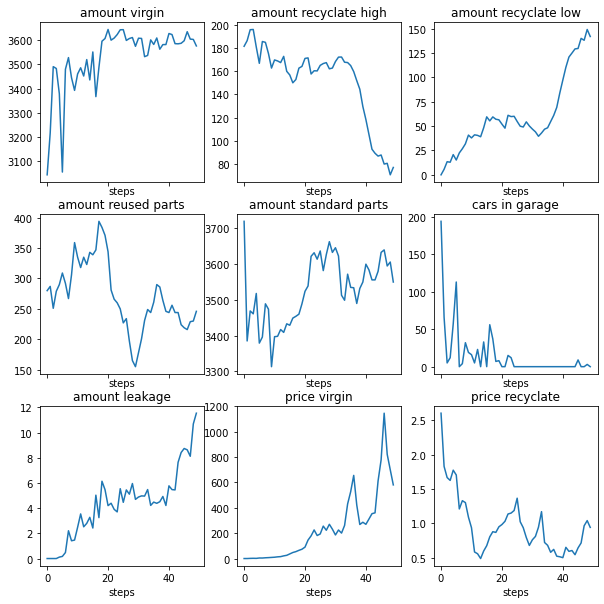

In [142]:
plot_results(results=results)

It can be deduced from the above graphs that the demand of virgin plastic is reduced as soon as the amount of recyclate increases in the system. The increased oil price increases the pricing of virgin plastic on the other hand, price of recyclate fluctuates based on the previous rounds. Overall the price of recyclate is reduced from its starting point.
Thus, the model exhibits expected theoretical behaviour under extreme value of levers and is successfully validated.